In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

# Introduction: movement analysis

From a sequence of signaling events, _eg_ GPS measurements, determine locations where the user remains for a significant duration of time, called "stays". For each of these, there should be a beginning and end, as well as a location. 

Generally, this is meant for movement on the surface of the earth, but for present purposes, it is easiest to illustrate in one spatial dimension "1D"; all of the problems and strategies can be generalized to 2D as needed.

**Note** the signaling events for a given user, form a set $\mathcal{E} :=  \{e_i = (\mathbf{x}_i, t_i), i=[0,N-1] \; | \; t_{i+1}>t_i\}$

In [3]:
from datetime import datetime, date
import time

In [4]:
from synthetic_data.trajectory import get_stay
from synthetic_data.trajectory import get_journey_path, get_segments
from synthetic_data.masking import get_mask_with_duplicates
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr

dsec = 1/3600.0
time = np.arange(0,24,dsec)
stays = [
        get_stay(  0.00,  6.00,-1.00), #home
        get_stay(  7.50, 16.50, 1.00), #work, afternoon
        get_stay( 18.00, 24.00,-1.00)  # overnight
    ]

t_segs, x_segs = get_stay_segs(stays)


raw_journey = get_journey_path(time, get_segments(time, stays, threshold=0.5))


dup_mask = get_mask_with_duplicates(time, 0.005, 0.6)

time_sub = time[dup_mask]
raw_journey_sub = raw_journey[dup_mask]

segments = get_segments(time, stays, threshold=0.5)
new_stays = get_adjusted_stays(segments, time_sub)
new_t_segs, new_x_segs = get_stay_segs(new_stays)      

noises = get_noise_arr(0.02, 0.15, len(segments))

noise_segments = get_noisy_segs(segments, noises)

noise_journey_sub = get_noisy_path(time_sub, raw_journey_sub, noise_segments)

In [5]:
zero_hour = datetime.combine(date.today(), datetime.min.time()).timestamp()
max_hour = datetime.combine(date.today(), datetime.max.time()).timestamp()

In [6]:
timestamp_sub = time_sub+zero_hour

In [7]:
timestamp_sub[0]

1591308000.2669444

In [21]:
datetime.fromtimestamp(round(timestamp_sub[1],1))

datetime.datetime(2020, 6, 5, 0, 0, 0, 300000)

In [22]:
convert_tstamp = lambda x: datetime.fromtimestamp(round(x,1))

In [23]:
convert_tstamp(1591221600.1325)

datetime.datetime(2020, 6, 4, 0, 0, 0, 100000)

In [24]:
datetime_sub = np.array(list(map(convert_tstamp, list((time_sub+zero_hour)))))

In [25]:
datetime_sub[:100]

array([datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 400000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 400000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 700000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 900000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 900000),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1, 100000),
       datetime.datetime(20

In [26]:
import matplotlib.dates as mdates

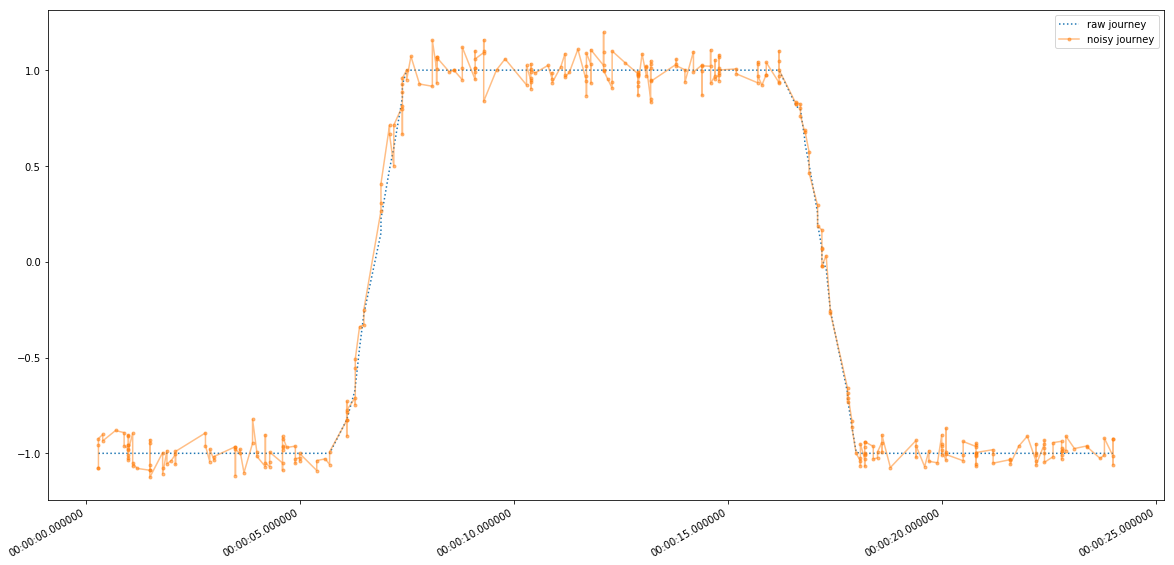

In [28]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')

#plt.plot(new_t_segs, new_x_segs, 'ko--', linewidth=3.0, markerfacecolor='w', markersize=4.0, markeredgewidth=1.0, label='adjusted raw stays')
ax.plot(datetime_sub, raw_journey_sub, ':', label='raw journey')
ax.plot(datetime_sub, noise_journey_sub, '.-', label='noisy journey', alpha=0.5)

myFmt = mdates.DateFormatter('%H:%M:%S.%f')
ax.xaxis.set_major_formatter(myFmt)

fig.autofmt_xdate()
plt.legend();

In [29]:
from datetime import timedelta

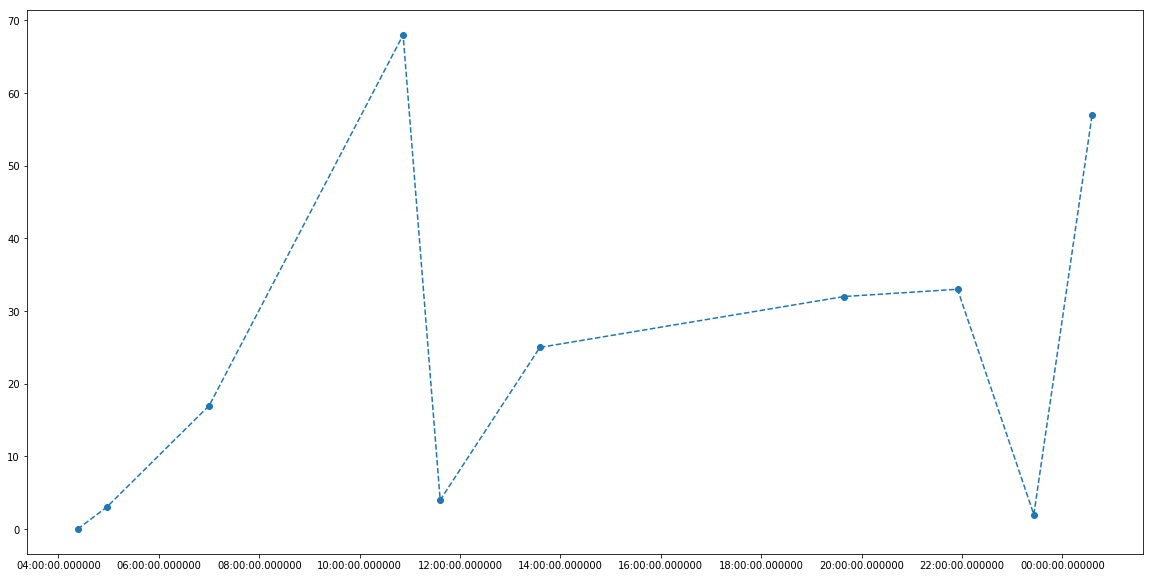

In [30]:

fig, ax = plt.subplots(1,1,figsize=(20,10))
y = np.random.randint(0,100,(3600*25))
x = [datetime.combine(date.today(), datetime.min.time()) + timedelta(seconds=i) for i in range(3600*25)]

masko = np.sort(np.random.randint(0,3600*25,(10)))

plt.plot(np.array(x)[masko],y[masko],'o--')
myFmt = mdates.DateFormatter('%H:%M:%S.%f')
ax.xaxis.set_major_formatter(myFmt)



In [31]:
np.array(x)[masko]

array([datetime.datetime(2020, 6, 5, 4, 22, 47),
       datetime.datetime(2020, 6, 5, 4, 57, 30),
       datetime.datetime(2020, 6, 5, 7, 0, 11),
       datetime.datetime(2020, 6, 5, 10, 51, 57),
       datetime.datetime(2020, 6, 5, 11, 36, 17),
       datetime.datetime(2020, 6, 5, 13, 35, 26),
       datetime.datetime(2020, 6, 5, 19, 39, 1),
       datetime.datetime(2020, 6, 5, 21, 54, 42),
       datetime.datetime(2020, 6, 5, 23, 25, 55),
       datetime.datetime(2020, 6, 6, 0, 35, 34)], dtype=object)

In [32]:
datetime_sub

array([datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 300000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 400000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 400000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 700000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 900000),
       datetime.datetime(2020, 6, 5, 0, 0, 0, 900000),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1),
       datetime.datetime(2020, 6, 5, 0, 0, 1, 100000),
       datetime.datetime(20